<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/fa_assignment/icici_eda_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("quantmod")
install.packages("qrmtools")
install.packages("MASS")
install.packages("PerformanceAnalytics")
install.packages("TSA")
install.packages("forecast")
install.packages("fBasics")
install.packages("urca")
install.packages("DescTools")
install.packages("TTR")
install.packages("tseries")
install.packages("fBasics")
install.packages("lubridate")
install.packages("bestNormalize") # to use yeo.jhonson for negative values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Inst

# New Section

In [14]:
library(quantmod)
library(qrmtools)
library(MASS)
library(PerformanceAnalytics)
library(TSA)
library(forecast)
library(fBasics)
library(urca)
library(DescTools)
library(TTR)
library(tseries)
library(fBasics)
library(lubridate)
library(bestNormalize)

In [15]:
get_start_date <- function(num_years=5) {
  return(Sys.Date() - years(num_years))
}

start_date <- get_start_date()
start_date


[1] "2017-04-27"

In [91]:
# Download data from Yahoo Finance
symbol<-getSymbols("IBN",from=start_date,auto.assign=FALSE)



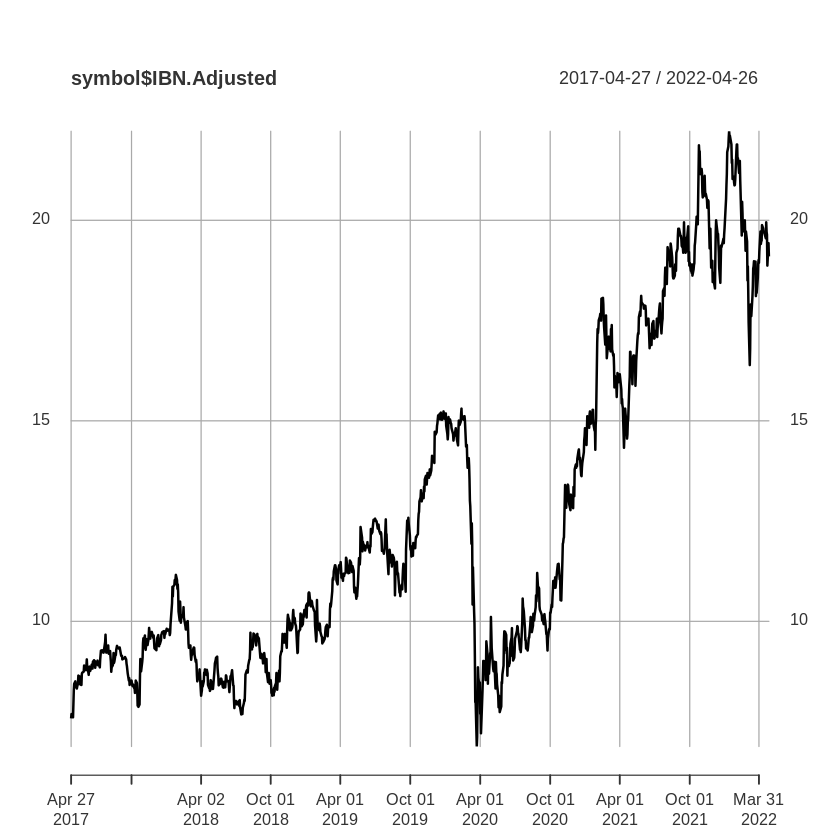

In [92]:
plot(symbol$IBN.Adjusted)

In [93]:
summary(symbol)# To understand any missing values in any columns, NA's   :4   
symbol<-na.omit(symbol)
symbol<-symbol[symbol$IBN.Volume>0,]

     Index               IBN.Open        IBN.High        IBN.Low      
 Min.   :2017-04-27   Min.   : 7.29   Min.   : 7.42   Min.   : 6.860  
 1st Qu.:2018-07-26   1st Qu.: 9.28   1st Qu.: 9.37   1st Qu.: 9.205  
 Median :2019-10-25   Median :10.96   Median :11.05   Median :10.880  
 Mean   :2019-10-26   Mean   :12.51   Mean   :12.60   Mean   :12.402  
 3rd Qu.:2021-01-26   3rd Qu.:15.19   3rd Qu.:15.24   3rd Qu.:15.095  
 Max.   :2022-04-26   Max.   :22.28   Max.   :22.34   Max.   :22.060  
   IBN.Close        IBN.Volume        IBN.Adjusted   
 Min.   : 6.900   Min.   : 1501100   Min.   : 6.879  
 1st Qu.: 9.285   1st Qu.: 4808700   1st Qu.: 9.236  
 Median :10.960   Median : 6717800   Median :10.911  
 Mean   :12.505   Mean   : 7798337   Mean   :12.464  
 3rd Qu.:15.185   3rd Qu.: 9412100   3rd Qu.:15.140  
 Max.   :22.220   Max.   :38079300   Max.   :22.220  

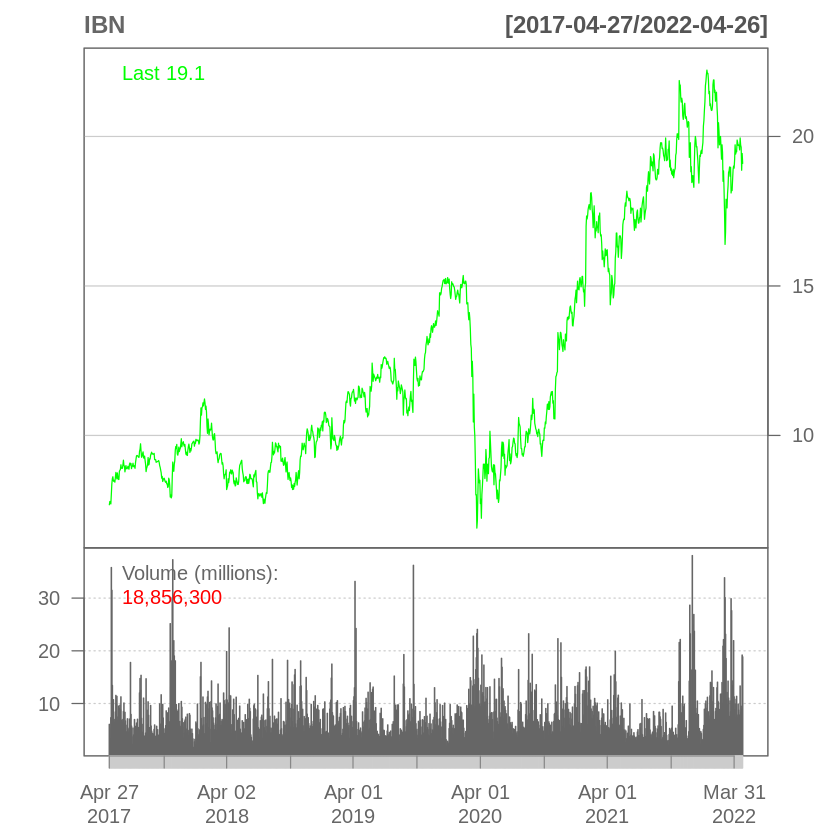

In [94]:
chartSeries(symbol,theme="white.mono",name="IBN",type = 'line', up.col = "green",dn.col="red")

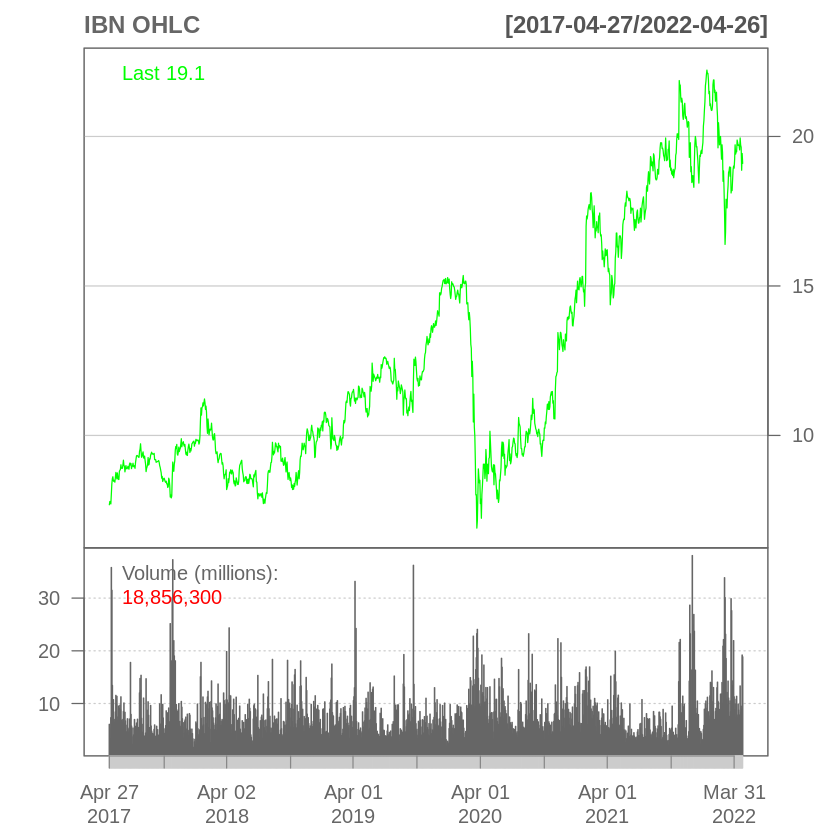

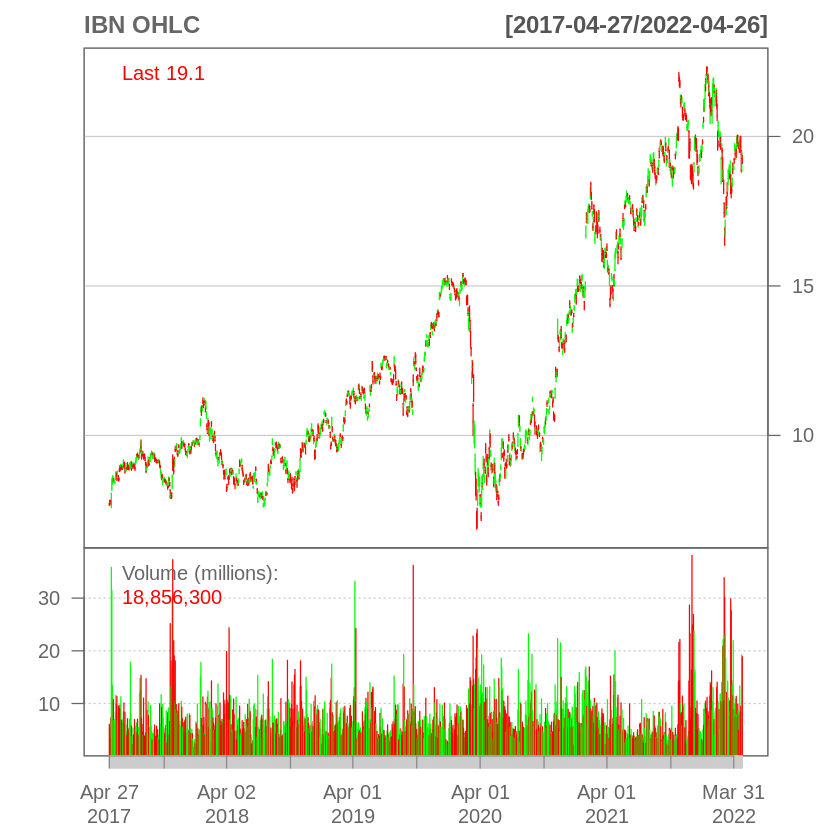

In [95]:
# Convert the Yahoo data into an OHLC Chart
symbol_ohlc<-as.quantmod.OHLC(symbol[,-6],col.names=c("Open","High","Low","Close","Volume"))
# Plotting the Open High Low Close charts along with volume
chartSeries(symbol_ohlc, theme="white.mono", type ='line', name="IBN OHLC", up.col = "green",dn.col="red")
chartSeries(symbol_ohlc, theme="white.mono", type ='bar',  name="IBN OHLC", up.col = "green",dn.col="red")
# chartSeries(symbol_ohlc, theme="white.mono", type ='hlc',  name="IBN OHLC", up.col = "green",dn.col="red")

In [96]:
# COmputing the returns using ln(p2/P1) - Geometric returns or Logarithmic returns
returns<-Return.calculate(symbol$IBN.Adjusted,method = "log")
returns<-na.omit(returns)
head(returns)
write.csv(returns,"icici_returns.csv",row.names=FALSE)

           IBN.Adjusted
2017-04-28   0.01410133
2017-05-01   0.00000000
2017-05-02  -0.01055721
2017-05-03   0.04270706
2017-05-04   0.04204147
2017-05-05   0.01931390

In [97]:
#Exploratory Data Analysis
#Calculating descriptive statistics

#Test of Normality
# p-value is less than 0.5, hence data price data is not normal 
# Basic idea is this - if the data is normal then we should use tests which work on normal data
# or if the data is not normal, then we should use other tests suitable for non-normal data
# given below 4 tests work well for normal data.
# The central limit theorem (CLT) states that the distribution of sample means approximates 
# a normal distribution as the sample size gets larger, regardless of the population's distribution. 
# Sample sizes equal to or greater than 30 are often considered sufficient for the CLT to hold.
# data from NSE/BSE is more accurate than from Yahoo, but need to do a lot of cleansing.
prices<-symbol[,6]
prices <- na.omit(prices)
jarqueberaTest(prices$IBN.Adjusted)


Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 158.8062
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 03:55:14 2022 by user: 


In [98]:
# same test on returns data
# p-value is less than 0.5, hence returns data is not normal for IBN
jarqueberaTest(returns$IBN.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 1978.2486
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Wed Apr 27 03:55:21 2022 by user: 


In [99]:
# Now we do other tests for same data for cross check
shapiroTest(prices$IBN.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8726
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 03:55:25 2022 by user: 


In [100]:
shapiroTest(returns$IBN.Adjusted)

Warning message in if (class(x) == "fREG") x = residuals(x):
“the condition has length > 1 and only the first element will be used”



Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9174
  P VALUE:
    < 2.2e-16 

Description:
 Wed Apr 27 03:55:28 2022 by user: 


In [101]:
# Test for stationarity - Augmented Dickey-Fuller Test
adf.test(prices$IBN.Adjusted) #  p-value = 0.41, not stationary




	Augmented Dickey-Fuller Test

data:  prices$IBN.Adjusted
Dickey-Fuller = -2.4244, Lag order = 10, p-value = 0.3986
alternative hypothesis: stationary


In [102]:
adf.test(returns$IBN.Adjusted) 

Warning message in adf.test(returns$IBN.Adjusted):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  returns$IBN.Adjusted
Dickey-Fuller = -9.7561, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [103]:
# altrenative to adf.test, as adf is not giving required results
summary(ur.df(prices$IBN.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55030 -0.13049  0.00337  0.13173  1.95665 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
z.lag.1     0.0004957  0.0006087   0.814    0.416
z.diff.lag -0.0183272  0.0282589  -0.649    0.517

Residual standard error: 0.2821 on 1255 degrees of freedom
Multiple R-squared:  0.0008266,	Adjusted R-squared:  -0.0007657 
F-statistic: 0.5191 on 2 and 1255 DF,  p-value: 0.5952


Value of test-statistic is: 0.8144 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [104]:
summary(ur.df(returns$IBN.Adjusted))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.148017 -0.010584  0.000824  0.012081  0.117916 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.99721    0.04024 -24.781   <2e-16 ***
z.diff.lag -0.01804    0.02825  -0.639    0.523    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02372 on 1254 degrees of freedom
Multiple R-squared:  0.5078,	Adjusted R-squared:  0.507 
F-statistic: 646.9 on 2 and 1254 DF,  p-value: < 2.2e-16


Value of test-statistic is: -24.7806 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [105]:
summary(ur.kpss(prices$IBN.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 11.338 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [106]:
summary(ur.kpss(returns$IBN.Adjusted))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 7 lags. 

Value of test-statistic is: 0.0408 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


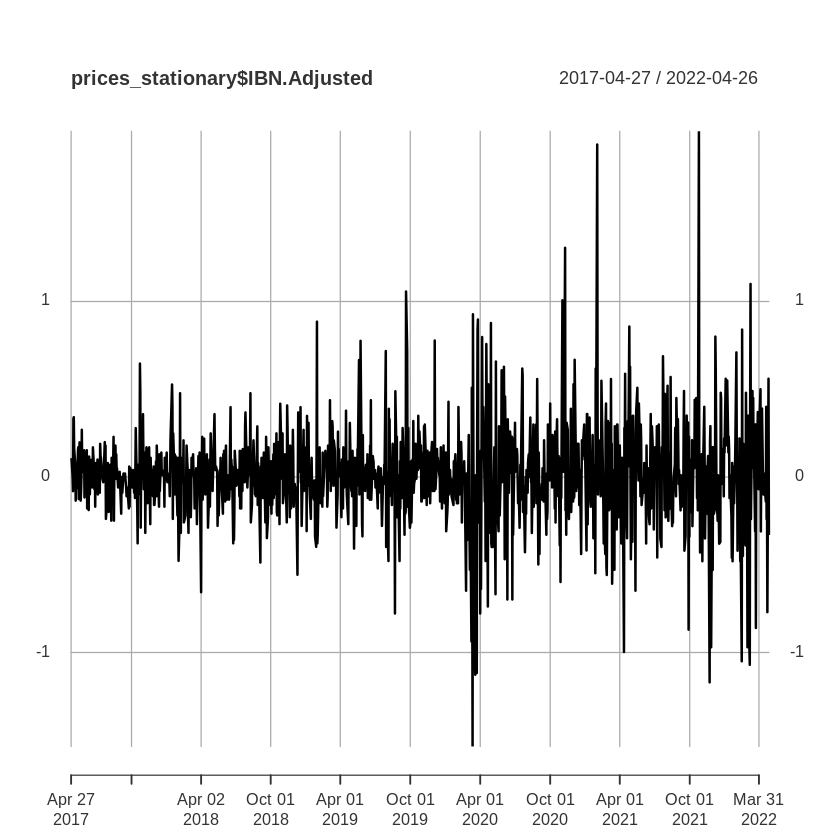

In [107]:
# if data is not stationary then the first step is to make
# the data stationalry
# method to follow is the 
# Differenceing the data

prices_stationary <- diff(prices)
plot (prices_stationary$IBN.Adjusted)

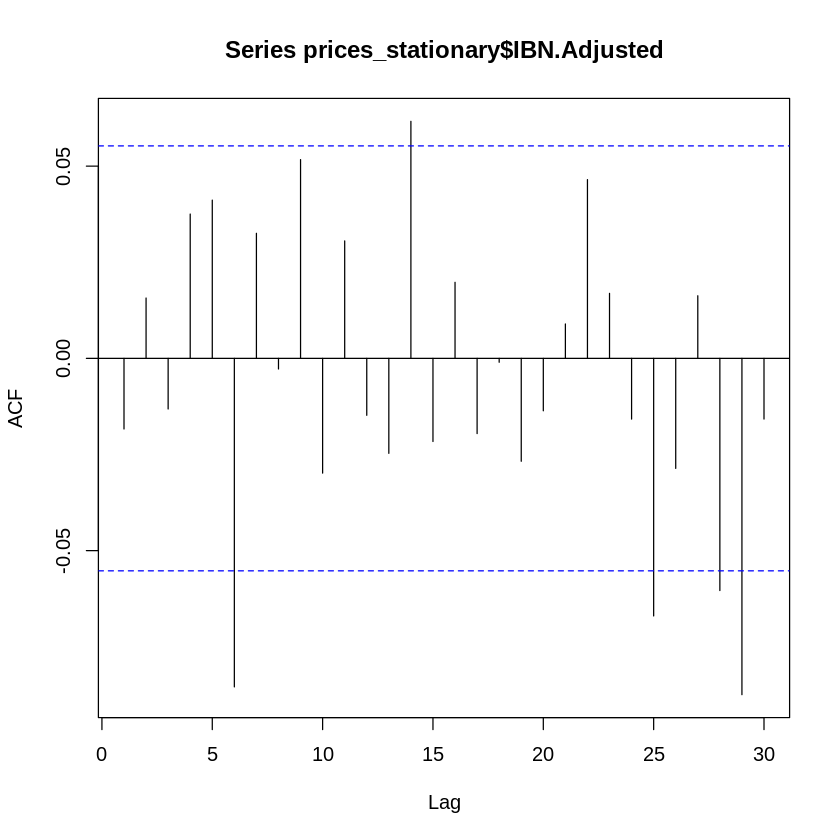

In [108]:
# Now if we have the stationary data
# we can make Auto correlation plots -
# Advised on stationrity of data

prices_stationary<-na.omit(prices_stationary)
acf(prices_stationary$IBN.Adjusted)

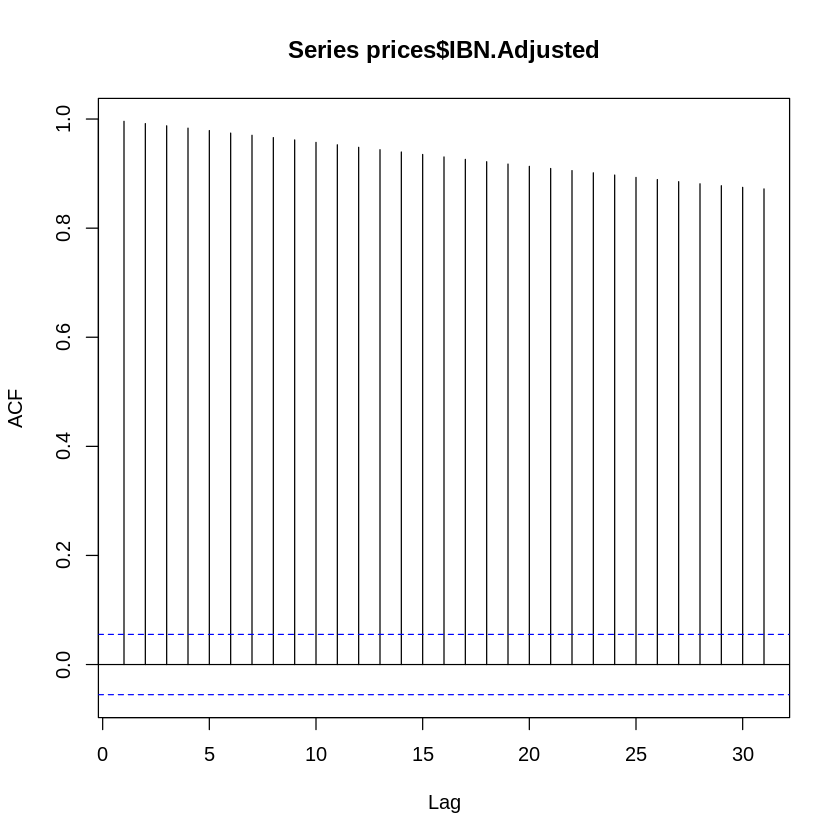

In [109]:
# on the otherhand if we compute ACF on data with trend
prices<-na.omit(prices)
acf(prices$IBN.Adjusted)

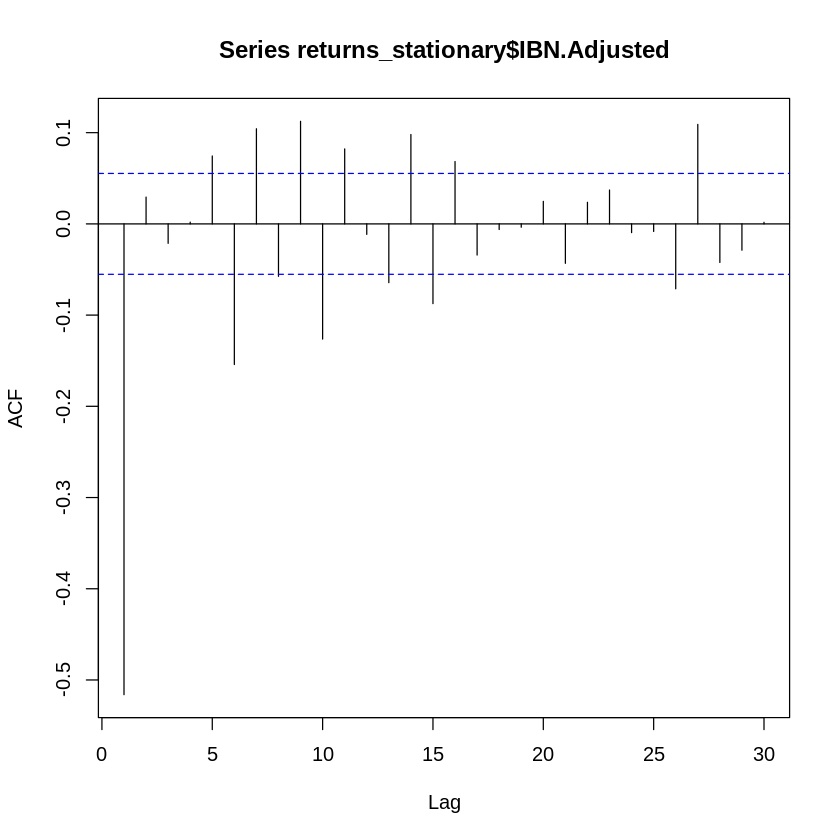

In [110]:
# similarly, finding acf for returns.
returns_stationary <- diff(returns)
returns_stationary<-na.omit(returns_stationary)
acf(returns_stationary$IBN.Adjusted)

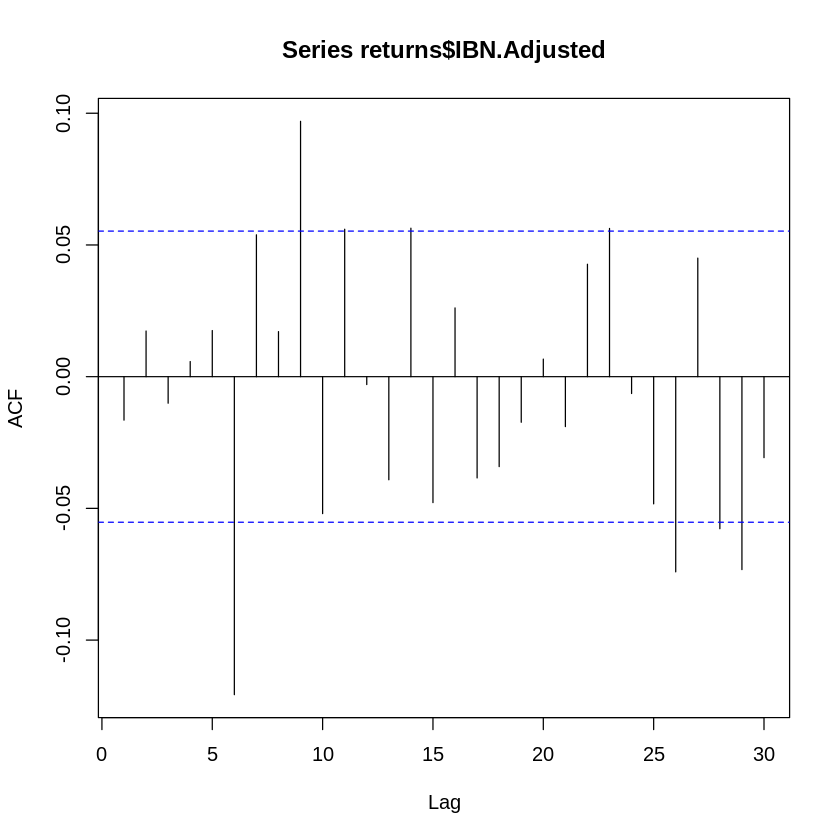

In [111]:
# on the otherhand if we compute ACF on data with trend
returns<-na.omit(returns)
acf(returns$IBN.Adjusted)

In [112]:
# tests for auto-corelation
Box.test(prices_stationary$IBN.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  prices_stationary$IBN.Adjusted
X-squared = 4.878, df = 5, p-value = 0.431


In [113]:
# for returns
Box.test(returns_stationary$IBN.Adjusted, lag =5, type = "Ljung-Box")


	Box-Ljung test

data:  returns_stationary$IBN.Adjusted
X-squared = 344.28, df = 5, p-value < 2.2e-16


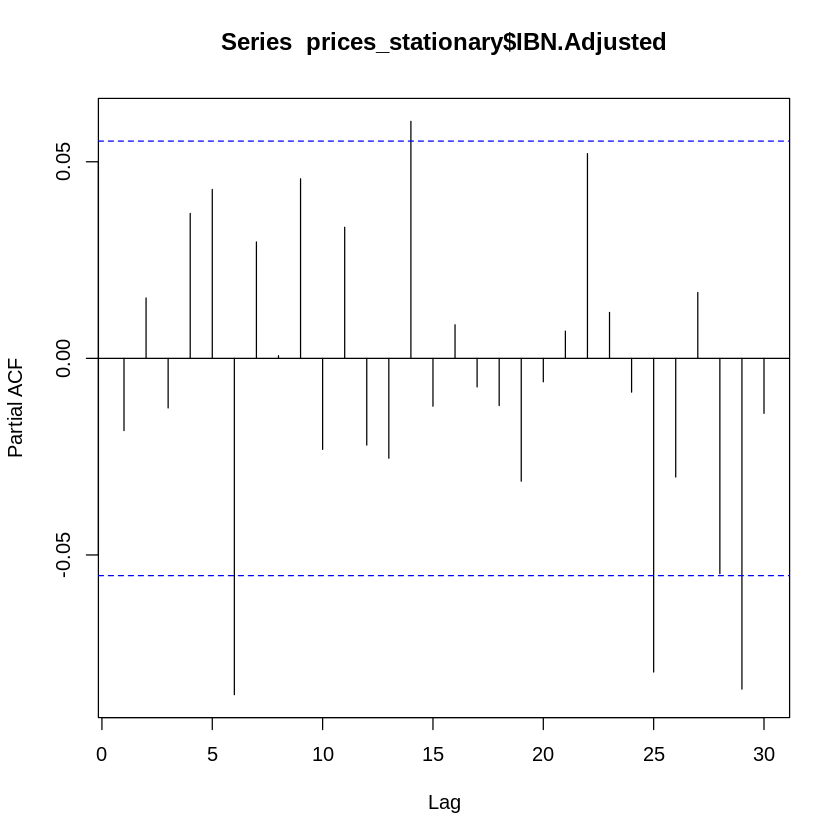

In [114]:
#PACF
pacf(prices_stationary$IBN.Adjusted)

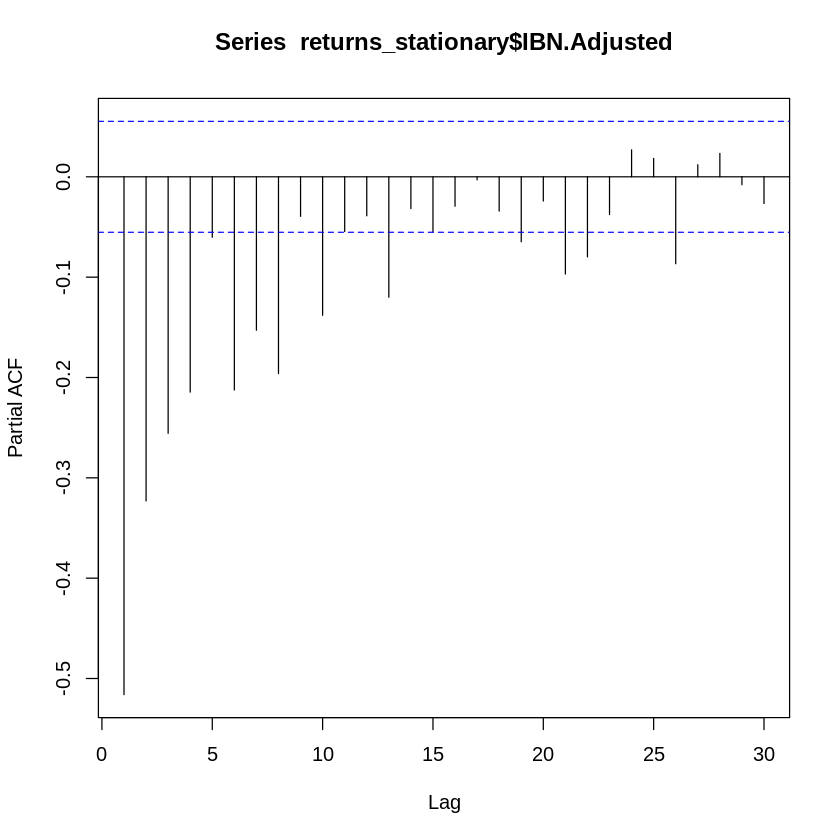

In [115]:
pacf(returns_stationary$IBN.Adjusted)

In [116]:
basicStats(prices)

,IBN.Adjusted
,<dbl>
nobs,1259.000000
NAs,0.000000
Minimum,6.879494
Maximum,22.219999
1. Quartile,9.236073
3. Quartile,15.139871
Mean,12.464473
Median,10.910563
Sum,15692.771406


In [117]:
BoxCox.lambda(prices$IBN.Adjusted)

[1] 0.7044034

In [118]:
# To make our data appear normal
prices_normal<-prices
prices_normal$IBN.Adjusted<-forecast::BoxCox(prices$IBN.Adjusted, lambda = 0.70440336609841)
basicStats(prices_normal)

,IBN.Adjusted
,<dbl>
nobs,1259.000000
NAs,0.000000
Minimum,4.103119
Maximum,11.193685
1. Quartile,5.376636
3. Quartile,8.206686
Mean,6.890424
Median,6.222967
Sum,8675.043417


In [119]:
returns_normal<-returns
# to handle negative values in the returns
returns_normal<-exp(returns_normal)
returns_normal<-na.omit(returns_normal)
BoxCox.lambda(returns_normal$IBN.Adjusted)


[1] 0.06412828

In [120]:
returns_normal$IBN.Adjusted<-forecast::BoxCox(returns$IBN.Adjusted, lambda = 0.0641282846623858)
# need to take log, basically to undo the exp above
# returns_normal<-log(returns_normal) 
basicStats(returns_normal)

,IBN.Adjusted
,<dbl>
nobs,1258.000000
NAs,0.000000
Minimum,-29.403684
Maximum,-1.993274
1. Quartile,-27.242086
3. Quartile,-3.849982
Mean,-15.097730
Median,-5.649504
Sum,-18992.944247


In [121]:
model<-auto.arima(prices$IBN.Adjusted,max.p = 10, max.d=2, max.q = 10, max.order = 20, trace = TRUE)
forecast(model, 10)
# Note the best fitting model below :  Best model: ARIMA(0,1,0)  


 Fitting models using approximations to speed things up...

 ARIMA(2,1,2) with drift         : Inf
 ARIMA(0,1,0) with drift         : 389.6585
 ARIMA(1,1,0) with drift         : 392.1216
 ARIMA(0,1,1) with drift         : 391.2561
 ARIMA(0,1,0)                    : 388.9802
 ARIMA(1,1,1) with drift         : 393.8885

 Now re-fitting the best model(s) without approximations...

 ARIMA(0,1,0)                    : 386.4479

 Best model: ARIMA(0,1,0)                    



     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1260           19.1 18.73871 19.46129 18.54745 19.65255
1261           19.1 18.58905 19.61095 18.31858 19.88142
1262           19.1 18.47422 19.72578 18.14296 20.05704
1263           19.1 18.37741 19.82259 17.99490 20.20510
1264           19.1 18.29212 19.90788 17.86446 20.33554
1265           19.1 18.21502 19.98498 17.74654 20.45346
1266           19.1 18.14411 20.05589 17.63809 20.56191
1267           19.1 18.07811 20.12189 17.53715 20.66285
1268           19.1 18.01612 20.18388 17.44235 20.75765
1269           19.1 17.95749 20.24251 17.35268 20.84732

In [122]:
cor(prices)

,IBN.Adjusted
IBN.Adjusted,1


In [123]:
cor(returns)

,IBN.Adjusted
IBN.Adjusted,1



	Ljung-Box test

data:  Residuals from ARIMA(0,1,0)
Q* = 20.009, df = 10, p-value = 0.02917

Model df: 0.   Total lags used: 10



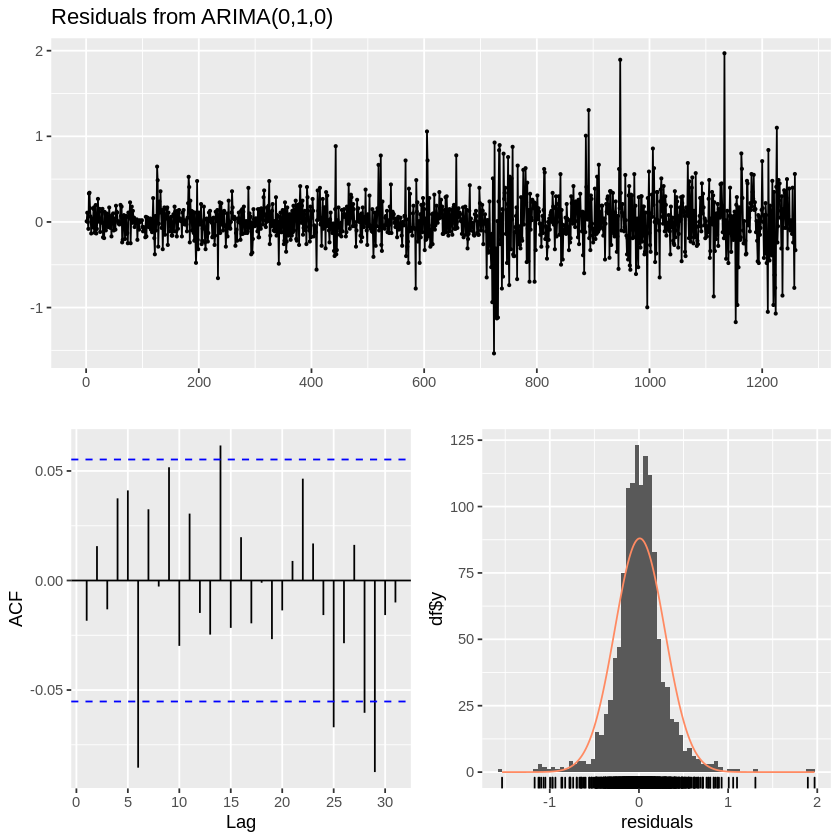

In [124]:
# Model analysis - The residuals will tell us if the model was able to capture 
# all of the information provided by the data.
checkresiduals(model)

In [125]:
# checking the accuracy of the model
accuracy(model)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.009156154,0.2818062,0.1927186,0.04542068,1.60951,0.9992369,-0.01836339


In [126]:
# Forecast for next day
fcast <- forecast(model, 30)
print(summary(fcast))
tail(prices)


Forecast method: ARIMA(0,1,0)

Model Information:
Series: prices$IBN.Adjusted 
ARIMA(0,1,0) 

sigma^2 = 0.07948:  log likelihood = -192.22
AIC=386.44   AICc=386.45   BIC=391.58

Error measures:
                      ME      RMSE       MAE        MPE    MAPE      MASE
Training set 0.009156154 0.2818062 0.1927186 0.04542068 1.60951 0.9992369
                    ACF1
Training set -0.01836339

Forecasts:
     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1260           19.1 18.73871 19.46129 18.54745 19.65255
1261           19.1 18.58905 19.61095 18.31858 19.88142
1262           19.1 18.47422 19.72578 18.14296 20.05704
1263           19.1 18.37741 19.82259 17.99490 20.20510
1264           19.1 18.29212 19.90788 17.86446 20.33554
1265           19.1 18.21502 19.98498 17.74654 20.45346
1266           19.1 18.14411 20.05589 17.63809 20.56191
1267           19.1 18.07811 20.12189 17.53715 20.66285
1268           19.1 18.01612 20.18388 17.44235 20.75765
1269           19.1 17.95749 20.242

           IBN.Adjusted
2022-04-19        19.95
2022-04-20        19.71
2022-04-21        19.64
2022-04-22        18.87
2022-04-25        19.43
2022-04-26        19.10

[1] 1259

[1] 0.3576723

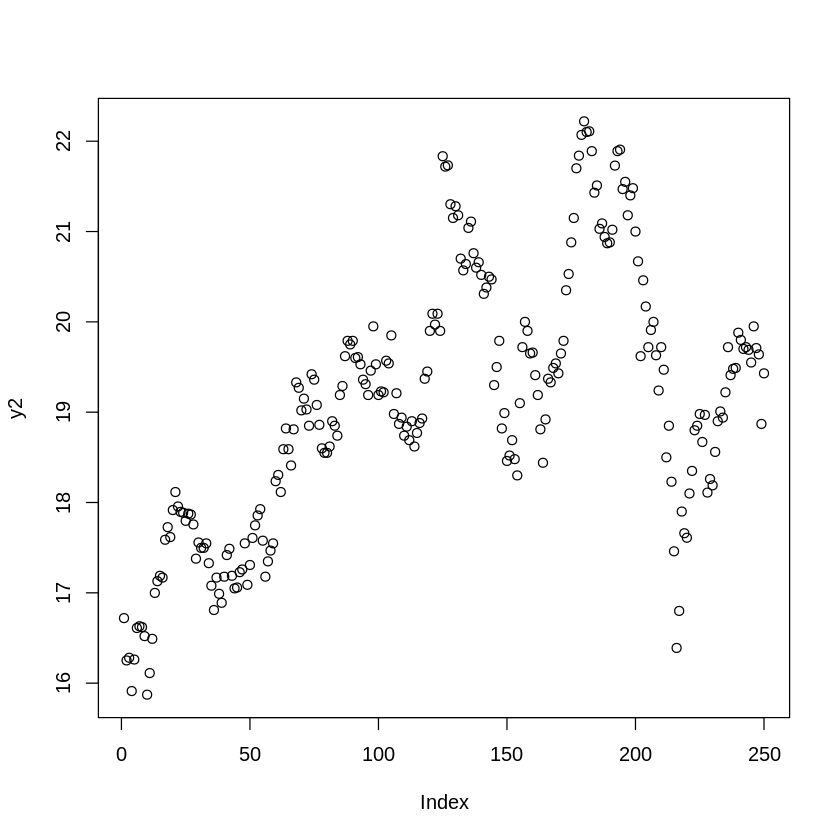

In [136]:
# Rolling window based price prediction. Test window is 250 days with 1 day of drift.
# the total data is of 1259 (numrows) days. 
# so in the loop we go from 1 to 250 and keep on increasing the model for next day using i in the loop.
# everytime we forecast using model and collect only the mean (there are other values as hi, lo etc)
# so there are 250 arima models built using rolling window mechanism. One model per day.
y2<-c()
numrows <-nrow(prices)
numrows
for (i in 1:250) {
  
  model2<-auto.arima(prices$IBN.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model2,h=1)$mean
  y2<-c(y2,y)
}
plot(y2)
RMSE(y2,tail(prices$IBN.Adjusted,250)) 


[1] 1258

[1] 0.01873241

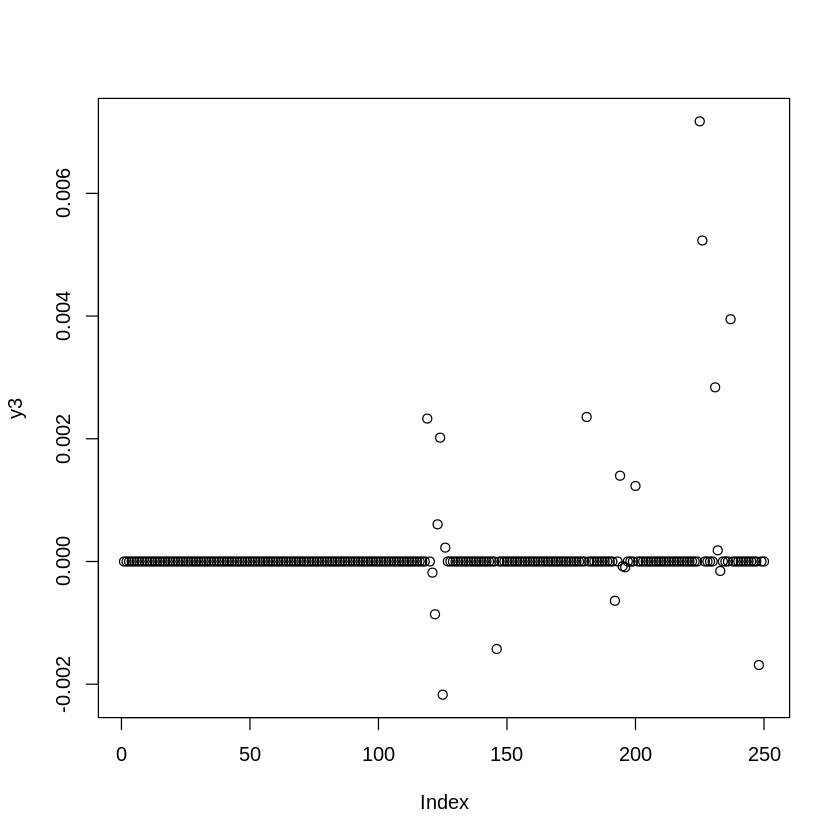

In [131]:
# Similarly for returns
y3<-c()
numrows <-nrow(returns)
numrows
for (i in 1:250) {
  
  model3<-auto.arima(returns$IBN.Adjusted[i:(i+numrows-251)],max.p = 10, max.q = 10, max.order = 20)
  y<-forecast::forecast(model3,h=1)$mean
  y3<-c(y3,y)
}
plot(y3)
RMSE(y3,tail(returns$IBN.Adjusted,250)) 